<a href="https://colab.research.google.com/github/alaa-alnissany/Diamonds-price-prediction/blob/main/Diamonds_EDA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

Main libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Sklearn tools

In [2]:
# Categorical Features encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,  LabelEncoder

# Feature scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import  minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Pipline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.multioutput import RegressorChain

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Ensempling models
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor,HistGradientBoostingRegressor


# Loss function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Get Diamonds Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
diamonds_path = "./drive/MyDrive/diamonds/diamonds.csv"
diamonds = pd.DataFrame(pd.read_csv(diamonds_path))

# Data checking

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We note that there are at least one zero value in every single column of ["x","y","z"], so we need to replace sparce features with nan value to estimate them later.

In [7]:
diamonds = diamonds.applymap(lambda x: np.NaN if x==0 else x)

In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53932 non-null  float64
 9   y           53933 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Checking Categorical Features values and their frequency

In [9]:
print("<<<<<<<<<<<<<<<<<<<<<<cut values>>>>>>>>>>>>>>>>>>>>>>>>>")
print(diamonds["cut"].value_counts())
print("\n<<<<<<<<<<<<<<<<<<<<<<color values>>>>>>>>>>>>>>>>>>>>>>>>>")
print(diamonds["color"].value_counts())
print("\n<<<<<<<<<<<<<<<<<<<<<<clarity values>>>>>>>>>>>>>>>>>>>>>>>>>")
print(diamonds["clarity"].value_counts())

<<<<<<<<<<<<<<<<<<<<<<cut values>>>>>>>>>>>>>>>>>>>>>>>>>
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<<<<<<<<<<<<<<<<<<<<<<color values>>>>>>>>>>>>>>>>>>>>>>>>>
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<<<<<<<<<<<<<<<<<<<<<<clarity values>>>>>>>>>>>>>>>>>>>>>>>>>
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


# Ploting Data:

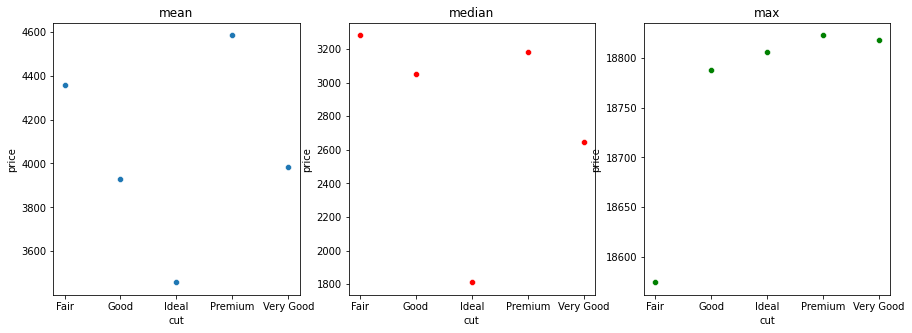

In [10]:
max_per_cut = diamonds.groupby("cut").max()
mean_per_cut = diamonds.groupby("cut").mean()
median_per_cut = diamonds.groupby("cut").median()

fig,ax = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(data = mean_per_cut, x = "cut", y = "price", ax = ax[0])
ax[0].set_title("mean")
sns.scatterplot(data = median_per_cut, x = "cut",y = "price", color = "r", ax = ax[1])
ax[1].set_title("median")
sns.scatterplot(data = max_per_cut, x = "cut", y = "price", color = "g", ax = ax[2])
ax[2].set_title("max")
plt.show()

In [11]:
median_per_cut

,Unnamed: 0,carat,depth,table,price,x,y,z
cut,,,,,,,,
Fair,19683.0,1.00,65.0,58.0,3282.0,6.18,6.10,3.97
Good,22137.5,0.82,63.4,58.0,3050.5,5.98,5.99,3.70
Ideal,31069.0,0.54,61.8,56.0,1810.0,5.25,5.26,3.23
Premium,24635.0,0.86,61.4,59.0,3185.0,6.11,6.06,3.72
Very Good,24916.0,0.71,62.1,58.0,2648.0,5.74,5.77,3.56


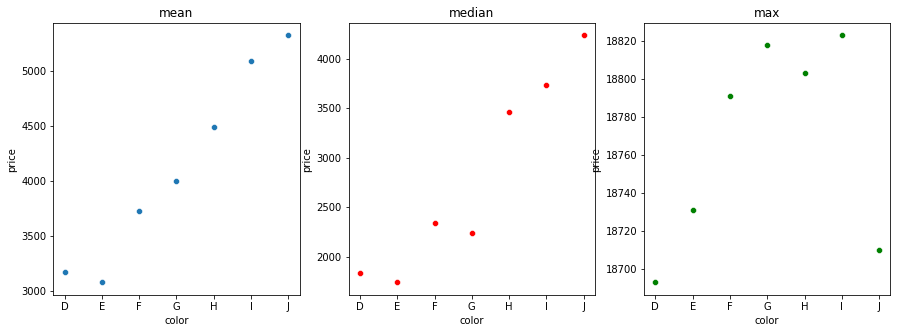

In [12]:
max_per_color = diamonds.groupby("color").max()
mean_per_color = diamonds.groupby("color").mean()
median_per_color = diamonds.groupby("color").median()

fig,ax = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(data = mean_per_color, x = "color", y = "price", ax = ax[0])
ax[0].set_title("mean")
sns.scatterplot(data = median_per_color, x = "color",y = "price", color = "r", ax = ax[1])
ax[1].set_title("median")
sns.scatterplot(data = max_per_color, x = "color", y = "price", color = "g", ax = ax[2])
ax[2].set_title("max")
plt.show()

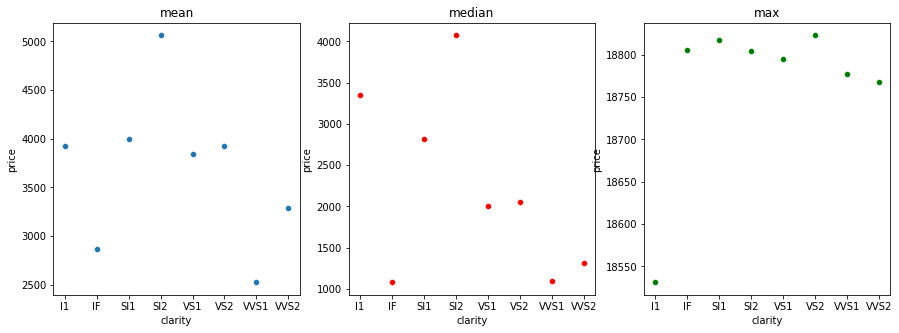

In [13]:
max_per_clarity = diamonds.groupby("clarity").max()
mean_per_clarity = diamonds.groupby("clarity").mean()
median_per_clarity = diamonds.groupby("clarity").median()

fig,ax = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(data = mean_per_clarity, x = "clarity", y = "price", ax = ax[0])
ax[0].set_title("mean")
sns.scatterplot(data = median_per_clarity, x = "clarity",y = "price", color = "r", ax = ax[1])
ax[1].set_title("median")
sns.scatterplot(data = max_per_clarity, x = "clarity", y = "price", color = "g", ax = ax[2])
ax[2].set_title("max")
plt.show()

In [14]:
display(diamonds[diamonds["x"].isnull()])
display(diamonds[diamonds["y"].isnull()])
display(diamonds[diamonds["z"].isnull()])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,NaN,NaN,NaN
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,NaN,NaN,NaN
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,NaN
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,NaN
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,NaN
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,NaN
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,NaN
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,NaN
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,NaN


In [15]:
"""
diamonds["length_to_width_ratio"] = diamonds["y"]/diamonds["x"]
diamonds.describe()
"""

'\ndiamonds["length_to_width_ratio"] = diamonds["y"]/diamonds["x"]\ndiamonds.describe()\n'

First we assume x = y ,beacuse i'd taken a look on the width to length ratios and see that it the megority of it has 1:1 ratio which refer to rounded shape, then we compute z (Nan values) by using the total depth percentage formula.

In [16]:
diamonds["x"] = np.where((diamonds["x"].isna()) & (~diamonds["y"].isna()),diamonds["y"],diamonds["x"])
diamonds["y"] = np.where((~diamonds["x"].isna()) & (diamonds["y"].isna()),diamonds["x"],diamonds["y"])
diamonds["z"] = np.where((~diamonds["x"].isna()) & (~diamonds["y"].isna())& (diamonds["z"].isna()),diamonds["depth"]*(diamonds["x"]+diamonds["y"])/200,diamonds["z"])

In [17]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53933 non-null  float64
 9   y           53933 non-null  float64
 10  z           53933 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [18]:
display(diamonds[diamonds["z"].isnull()])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,NaN,NaN,NaN
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


In [19]:
diamonds.dropna(axis=0,inplace=True)

## Adding new featuers

In [20]:
diamonds["v"] = 1/12*np.pi*diamonds["z"]*(diamonds["x"]+diamonds["y"])**2/4*0.85+1/12*np.pi*diamonds["z"]*0.15*((diamonds["x"]+diamonds["y"])**2/4+((diamonds["x"]+diamonds["y"])*diamonds["table"]/200)**2+(diamonds["x"]+diamonds["y"])**2*diamonds["table"]/400)


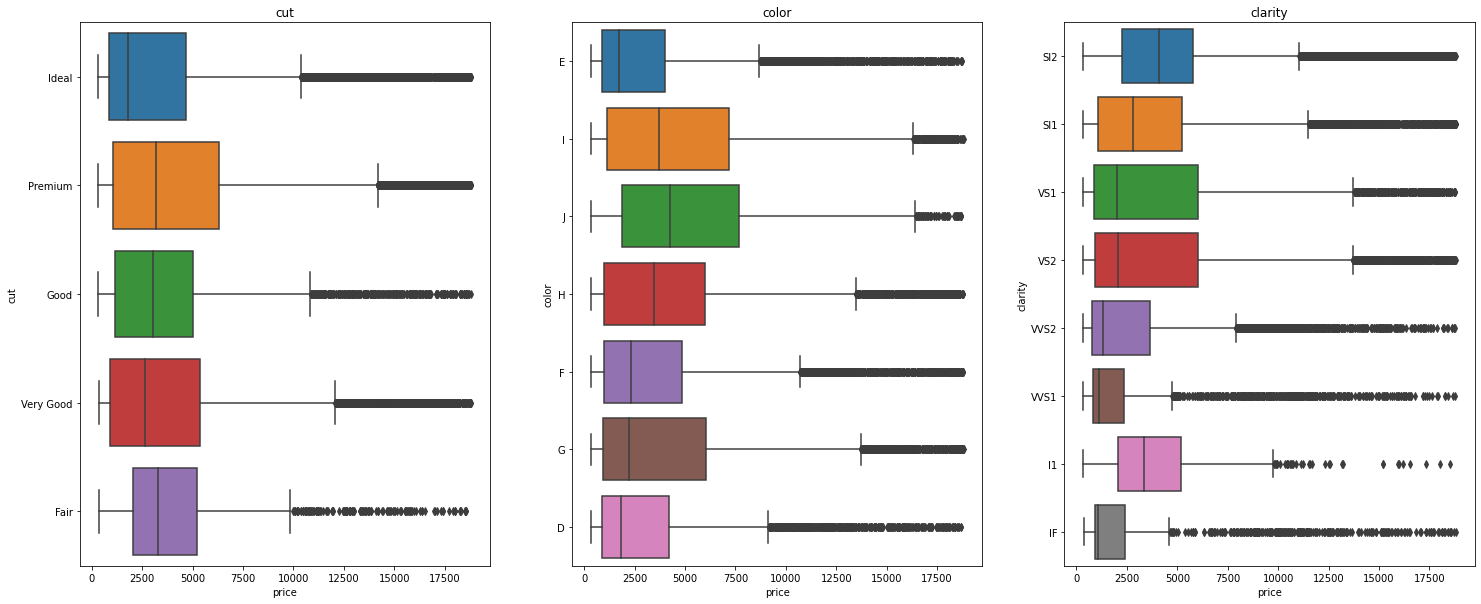

In [21]:
fig, ax=plt.subplots(1,3,figsize=(25,10))
sns.boxplot(data=diamonds,x="price",y="cut",ax=ax[0])
ax[0].set_title("cut")
sns.boxplot(data=diamonds,x="price",y="color",ax=ax[1])
ax[1].set_title("color")
sns.boxplot(data=diamonds,x="price",y="clarity",ax=ax[2])
ax[2].set_title("clarity")
plt.show()

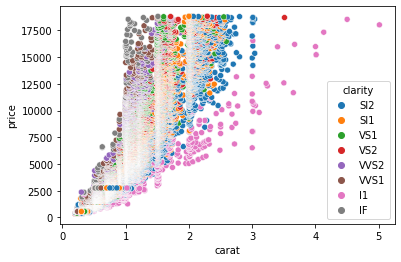

In [22]:
sns.scatterplot(data = diamonds,x="carat", y="price", hue="clarity")

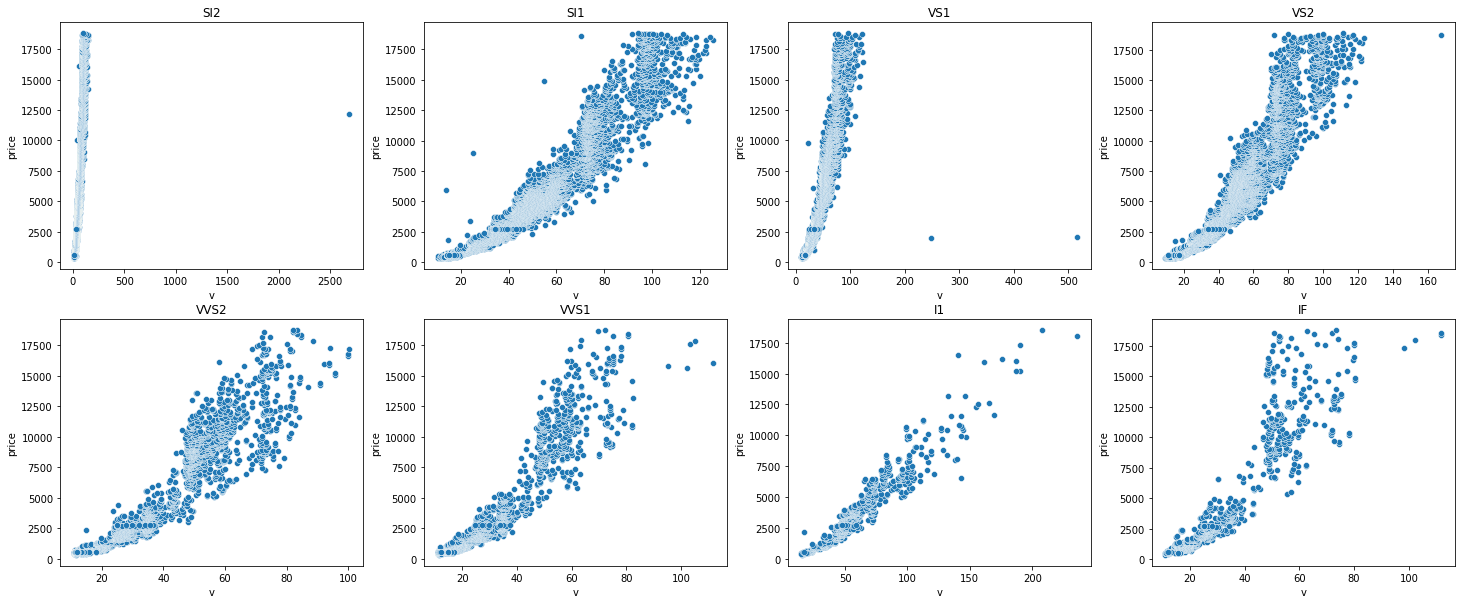

In [23]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["clarity"].unique():
  df = diamonds[diamonds["clarity"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="v", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = 1
    i = 0

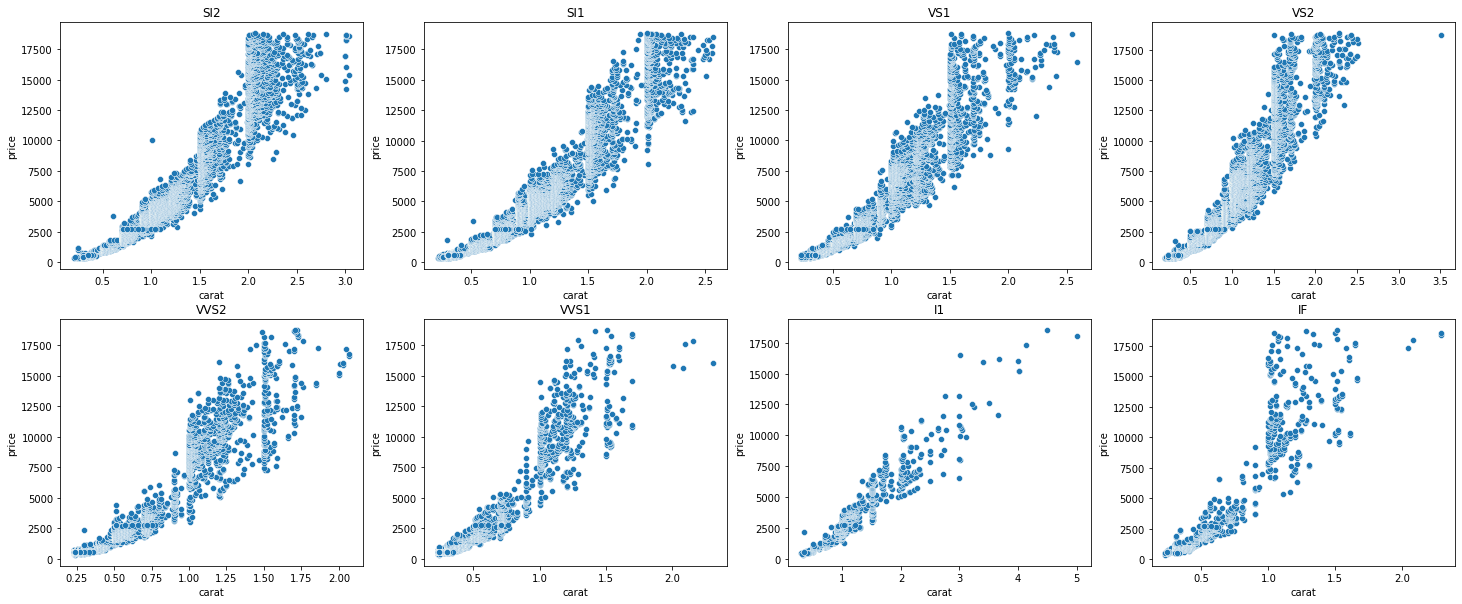

In [24]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["clarity"].unique():
  df = diamonds[diamonds["clarity"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="carat", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = 1
    i = 0

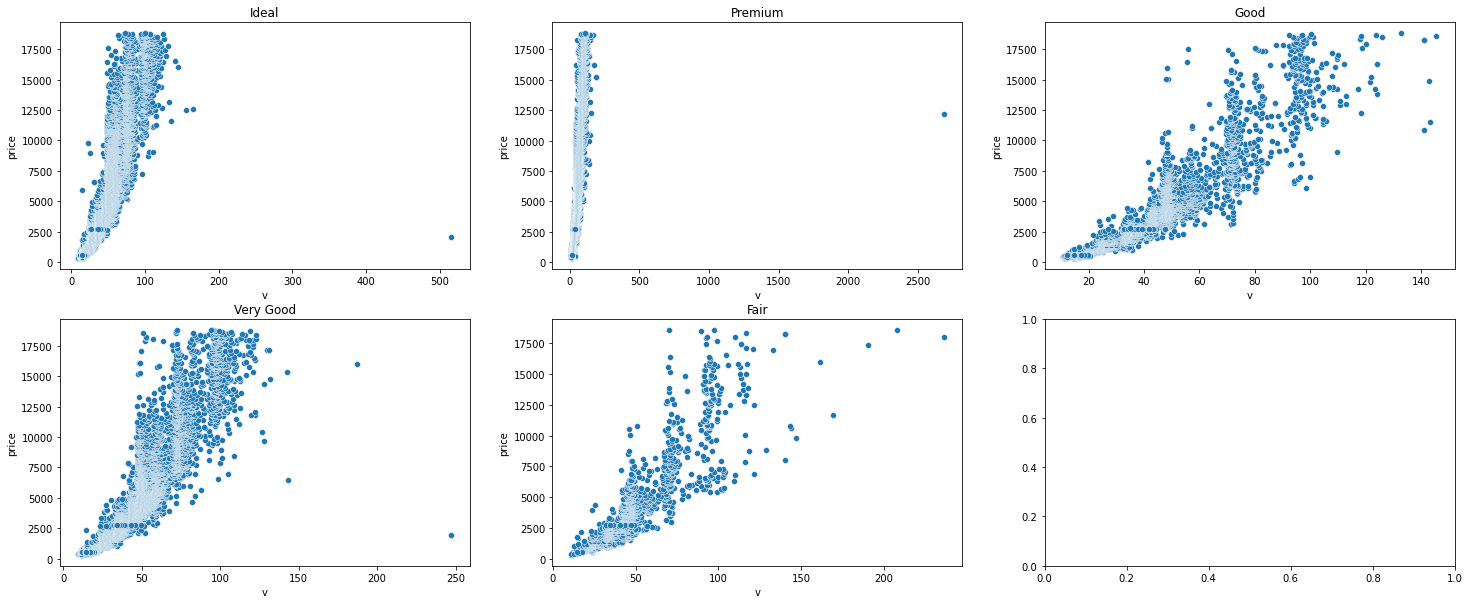

In [25]:
fig , ax =plt.subplots(2,3,figsize=(25,10))
i=j=0
for var in diamonds["cut"].unique():
  df = diamonds[diamonds["cut"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="v", y="price",ax= ax[j][i])
  i=i+1
  if i == 3:
    j = j+1
    i = 0

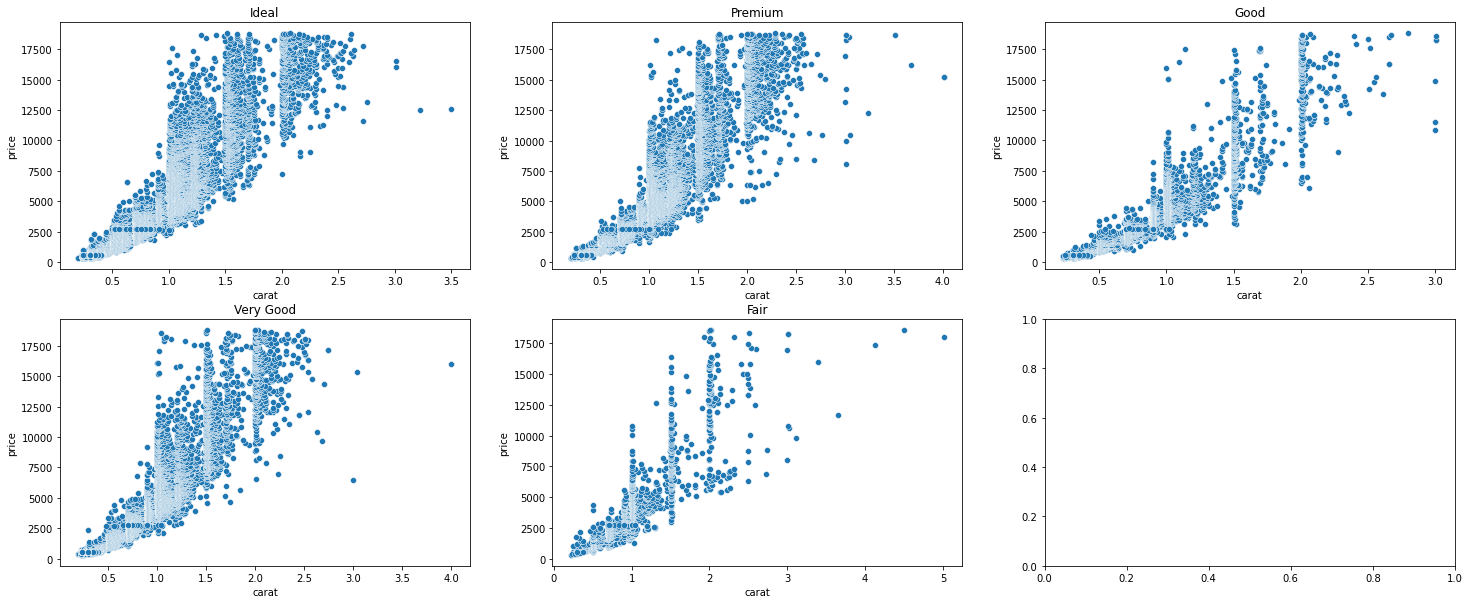

In [26]:
fig , ax =plt.subplots(2,3,figsize=(25,10))
i=j=0
for var in diamonds["cut"].unique():
  df = diamonds[diamonds["cut"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="carat", y="price",ax= ax[j][i])
  i=i+1
  if i == 3:
    j = j+1
    i = 0

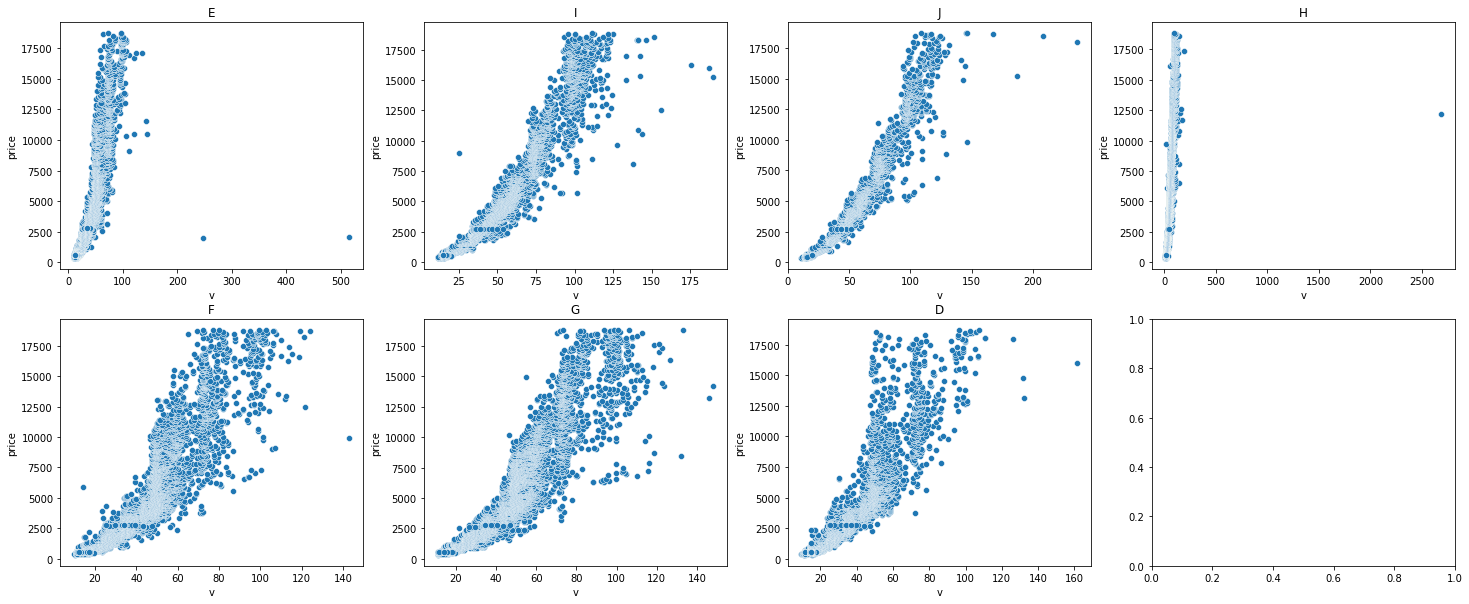

In [27]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["color"].unique():
  df = diamonds[diamonds["color"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="v", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = j+1
    i = 0

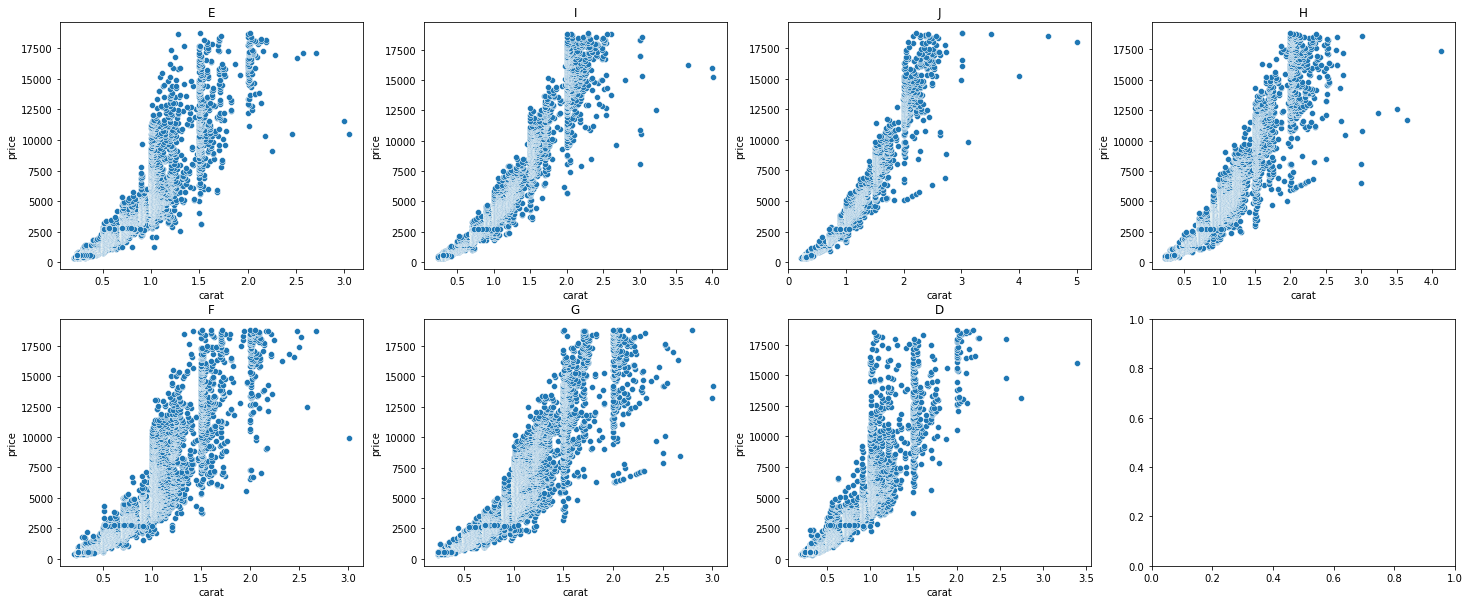

In [28]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["color"].unique():
  df = diamonds[diamonds["color"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="carat", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = j+1
    i = 0

From the above figures, we note that the relation between (price, volume) and (price, carat) seems to follow a second-degree equation, so we need to add two new features carat^2 and volume^2.

In [29]:
diamonds["v2"] = diamonds["v"]**2
diamonds["carat2"] = diamonds["carat"]**2

In [30]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,v,v2,carat2
count,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,5.393300e+04,53933.000000
mean,26970.195316,0.797884,61.749333,57.457002,3932.155026,5.732024,5.735270,3.540275,38.692917,2.151895e+03,0.861275
std,15571.473740,0.473983,1.432501,2.234052,3988.700283,1.119666,1.140339,0.702664,25.588377,3.115587e+04,1.056391
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,9.496926,9.019160e+01,0.040000
25%,13485.000000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,19.387421,3.758721e+02,0.160000
50%,26971.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,34.164495,1.167213e+03,0.490000
75%,40455.000000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,50.819535,2.582625e+03,1.081600
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,2685.138411,7.209968e+06,25.100100


## Features selection

This section is important to have a good knowledge about features contributions in the training process.

**Apply SelectKBest Algo**

In [31]:
x_ = diamonds.iloc[:,diamonds.columns != "price"]
x_.drop("Unnamed: 0",axis=1,inplace=True)
y_ = diamonds[["price"]].copy()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
catcut = {"Fair":0,"Good":1,"Very Good":2,"Premium":3,"Ideal":4}
x_["cut"] = x_["cut"].apply(lambda i: catcut[i])
catclarity = {'I1': 0, 'SI2' : 1, 'SI1' : 2, 'VS2' : 3, 'VS1' : 4, 'VVS2' : 5, 'VVS1' : 6 , 'IF' : 7}
x_["clarity"] = x_["clarity"].apply(lambda i: catclarity[i])
catcolor = {'J' : 0, 'I' : 1, 'H' : 2, 'G' : 3, 'F' : 4, 'E' : 5, 'D' : 6}
x_["color"] = x_["color"].apply(lambda i: catcolor[i])
x_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,carat,cut,color,clarity,depth,table,x,y,z,v,v2,carat2
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43,11.280342,127.246108,0.0529
1,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31,10.364832,107.429746,0.0441
2,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31,11.572259,133.917170,0.0529
3,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63,13.914117,193.602666,0.0841
4,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75,15.460268,239.019884,0.0961
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,5.75,5.76,3.50,34.421546,1184.842825,0.5184
53936,0.72,1,6,2,63.1,55.0,5.69,5.75,3.61,34.876176,1216.347629,0.5184
53937,0.70,2,6,2,62.8,60.0,5.66,5.68,3.56,34.277628,1174.955812,0.4900
53938,0.86,3,2,1,61.0,58.0,6.15,6.12,3.74,41.918477,1757.158721,0.7396


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
orderd_rank_features = SelectKBest(score_func=chi2,k= 12)
orderd_features = orderd_rank_features.fit(x_,y_)

In [35]:
dfscors = pd.DataFrame(orderd_features.scores_,columns=["score"])
dfcolumns = pd.DataFrame(x_.columns,columns=["features"])
features_rank = pd.concat([dfcolumns,dfscors], axis= 1)

In [36]:
features_rank.nlargest(12,"score")

,features,score
10,v2,4.995680e+09
9,v,7.353347e+05
11,carat2,6.521046e+04
3,clarity,2.140884e+04
2,color,1.776457e+04
0,carat,1.453340e+04
6,x,1.136205e+04
7,y,1.134683e+04
8,z,7.014836e+03
1,cut,6.950869e+03


**Information Gain**

In [37]:
from sklearn.feature_selection import mutual_info_regression

In [38]:
mutual_info = mutual_info_regression(x_,y_)
mutual_data = pd.Series(mutual_info,index=x_.columns)
print(mutual_data.sort_values(ascending=False))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


carat2     1.963582
carat      1.960327
v2         1.721878
y          1.492680
x          1.483560
v          1.475655
z          1.433396
clarity    0.360337
color      0.284984
cut        0.101865
table      0.054058
depth      0.036431
dtype: float64


**Features Importance based on Models**

In [39]:
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model1 = ExtraTreesRegressor()
model2 = XGBRegressor(objective='reg:squarederror')
model1.fit(x_,y_)
model2.fit(x_,y_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


XGBRegressor(objective='reg:squarederror')

In [40]:
EXT_ranked_features = pd.Series(model1.feature_importances_,index=x_.columns)
XGB_ranked_features = pd.Series(model2.feature_importances_,index=x_.columns)

In [41]:
EXT_ranked_features.nlargest(12)

x          0.305481
carat      0.281802
carat2     0.152490
clarity    0.065772
y          0.054364
z          0.042770
v          0.040463
color      0.033304
v2         0.015313
cut        0.003426
table      0.002490
depth      0.002326
dtype: float64

In [42]:
XGB_ranked_features.nlargest(12)

v          0.418616
y          0.383175
carat      0.095906
z          0.048738
clarity    0.030498
color      0.013018
x          0.006141
cut        0.001875
depth      0.001374
table      0.000657
v2         0.000000
carat2     0.000000
dtype: float32

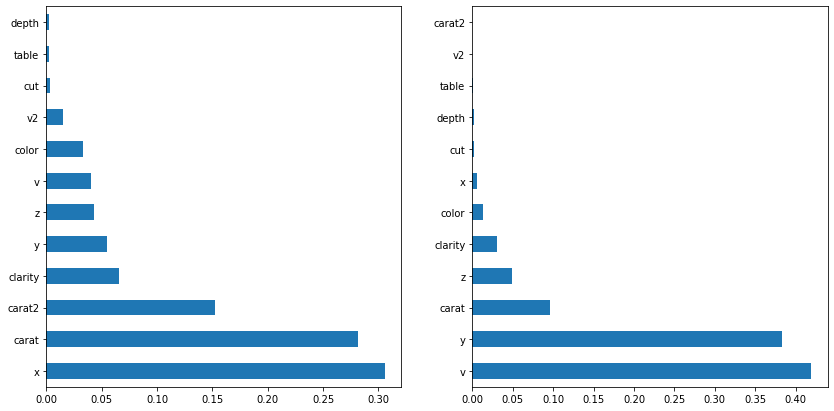

In [43]:
fig ,ax = plt.subplots(1,2,figsize=(14,7))
EXT_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[0])
XGB_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[1])
plt.show()

**Linear correlation**

using pearson corroletion

In [44]:
catcut = {"Fair":0,"Good":1,"Very Good":2,"Premium":3,"Ideal":4}
diamonds["cut"] = diamonds["cut"].apply(lambda i: catcut[i])
catclarity = {'I1': 0, 'SI2' : 1, 'SI1' : 2, 'VS2' : 3, 'VS1' : 4, 'VVS2' : 5, 'VVS1' : 6 , 'IF' : 7}
diamonds["clarity"] = diamonds["clarity"].apply(lambda i: catclarity[i])
catcolor = {'J' : 0, 'I' : 1, 'H' : 2, 'G' : 3, 'F' : 4, 'E' : 5, 'D' : 6}
diamonds["color"] = diamonds["color"].apply(lambda i: catcolor[i])
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,v,v2,carat2
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,11.280342,127.246108,0.0529
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,10.364832,107.429746,0.0441
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,11.572259,133.917170,0.0529
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,13.914117,193.602666,0.0841
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,15.460268,239.019884,0.0961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50,34.421546,1184.842825,0.5184
53936,53937,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61,34.876176,1216.347629,0.5184
53937,53938,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56,34.277628,1174.955812,0.4900
53938,53939,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74,41.918477,1757.158721,0.7396


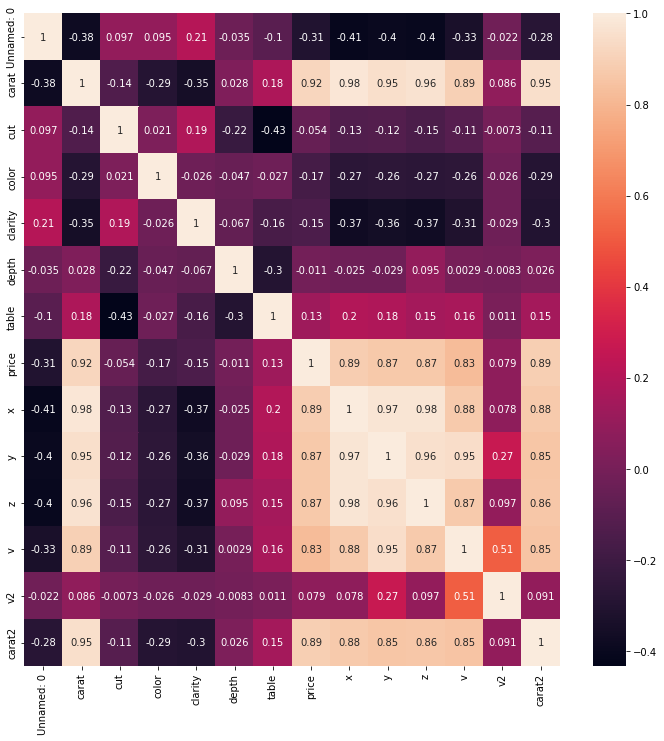

In [45]:
corr = diamonds.corr(method='pearson')#'pearson', 'kendall', 'spearman'
top_features = corr.index
plt.figure(figsize=(12,12))
sns.heatmap(diamonds[top_features].corr(method='pearson'),annot=True)
plt.show()

**linear Models with p-values and null hypothesies**

In [46]:
X_ = diamonds.iloc[:,diamonds.columns != "Unnamed: 0"]
std = StandardScaler()
X_ = pd.DataFrame(std.fit_transform(X_),columns = X_ .columns)

In [47]:
X_

,carat,cut,color,clarity,depth,table,price,x,y,z,v,v2,carat2
0,-1.198123,0.981434,0.937139,-1.245255,-0.174056,-1.099806,-0.904101,-1.591582,-1.539268,-1.580109,-1.071300,-0.064985,-0.765230
1,-1.240319,0.085790,0.937139,-0.638129,-1.360803,1.585921,-0.904101,-1.645170,-1.662039,-1.750889,-1.107079,-0.065621,-0.773561
2,-1.198123,-1.705499,0.937139,0.576125,-3.385253,3.376406,-0.903850,-1.502269,-1.460343,-1.750889,-1.059892,-0.064771,-0.765230
3,-1.071535,0.085790,-1.414232,-0.031002,0.454221,0.243057,-0.902095,-1.368299,-1.320033,-1.295475,-0.968371,-0.062855,-0.735695
4,-1.029339,-1.705499,-2.002074,-1.245255,1.082499,0.243057,-0.901845,-1.243261,-1.214800,-1.124695,-0.907946,-0.061398,-0.724336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53928,-0.164321,0.981434,1.524981,-0.638129,-0.662717,-0.204564,-0.294624,0.016055,0.021687,-0.057319,-0.166928,-0.031039,-0.324575
53929,-0.164321,-1.705499,1.524981,-0.638129,0.942882,-1.099806,-0.294624,-0.037533,0.012917,0.099230,-0.149161,-0.030028,-0.324575
53930,-0.206517,-0.809854,1.524981,-0.638129,0.733456,1.138300,-0.294624,-0.064327,-0.048469,0.028071,-0.172552,-0.031357,-0.351459
53931,0.131051,0.085790,-0.826389,-1.245255,-0.523099,0.243057,-0.294624,0.373308,0.337385,0.284242,0.126057,-0.012670,-0.115181


In [48]:
y = X_["price"]
col_to_exclude = ["x","y","z","price"]
X_.drop(col_to_exclude,axis=1, inplace= True)
X = X_

In [49]:
import statsmodels.api as sma

In [50]:
LinearRegressionmo = LinearRegression()

X2  = sma.add_constant(X)
_0  = sma.OLS(y, X2).fit()
print(_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.699e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:40:56   Log-Likelihood:                -13088.
No. Observations:               53933   AIC:                         2.620e+04
Df Residuals:                   53923   BIC:                         2.628e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.201e-16      0.001  -9.04e-14      1.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We note that the p-values equal to zero for all features, which mean that they are dependent with target vector. 

But as we noticed that the used data is a non-linear data which make this test results is useless.

## Test/Train split

In [51]:
diamonds.drop(["Unnamed: 0"],axis= 1 , inplace= True)

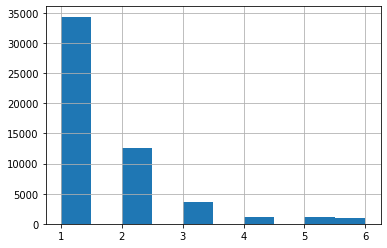

In [52]:
diamonds["v2_cut"] = pd.cut(diamonds["v2"],bins=[0.,2000,4000,6000,8000,10000,np.inf],labels=[1,2,3,4,5,6])
diamonds["v2_cut"].hist()

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.3, random_state= 107)
for train_index, test_val_index in split.split(diamonds,diamonds["v2_cut"]):
  strat_train_set = diamonds.iloc[train_index]
  strat_test_val_set = diamonds.iloc[test_val_index]

In [54]:
for set_ in (strat_train_set,strat_test_val_set):
  set_.drop("v2_cut",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
strat_test_val_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16180 entries, 24282 to 51188
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16180 non-null  float64
 1   cut      16180 non-null  int64  
 2   color    16180 non-null  int64  
 3   clarity  16180 non-null  int64  
 4   depth    16180 non-null  float64
 5   table    16180 non-null  float64
 6   price    16180 non-null  int64  
 7   x        16180 non-null  float64
 8   y        16180 non-null  float64
 9   z        16180 non-null  float64
 10  v        16180 non-null  float64
 11  v2       16180 non-null  float64
 12  carat2   16180 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

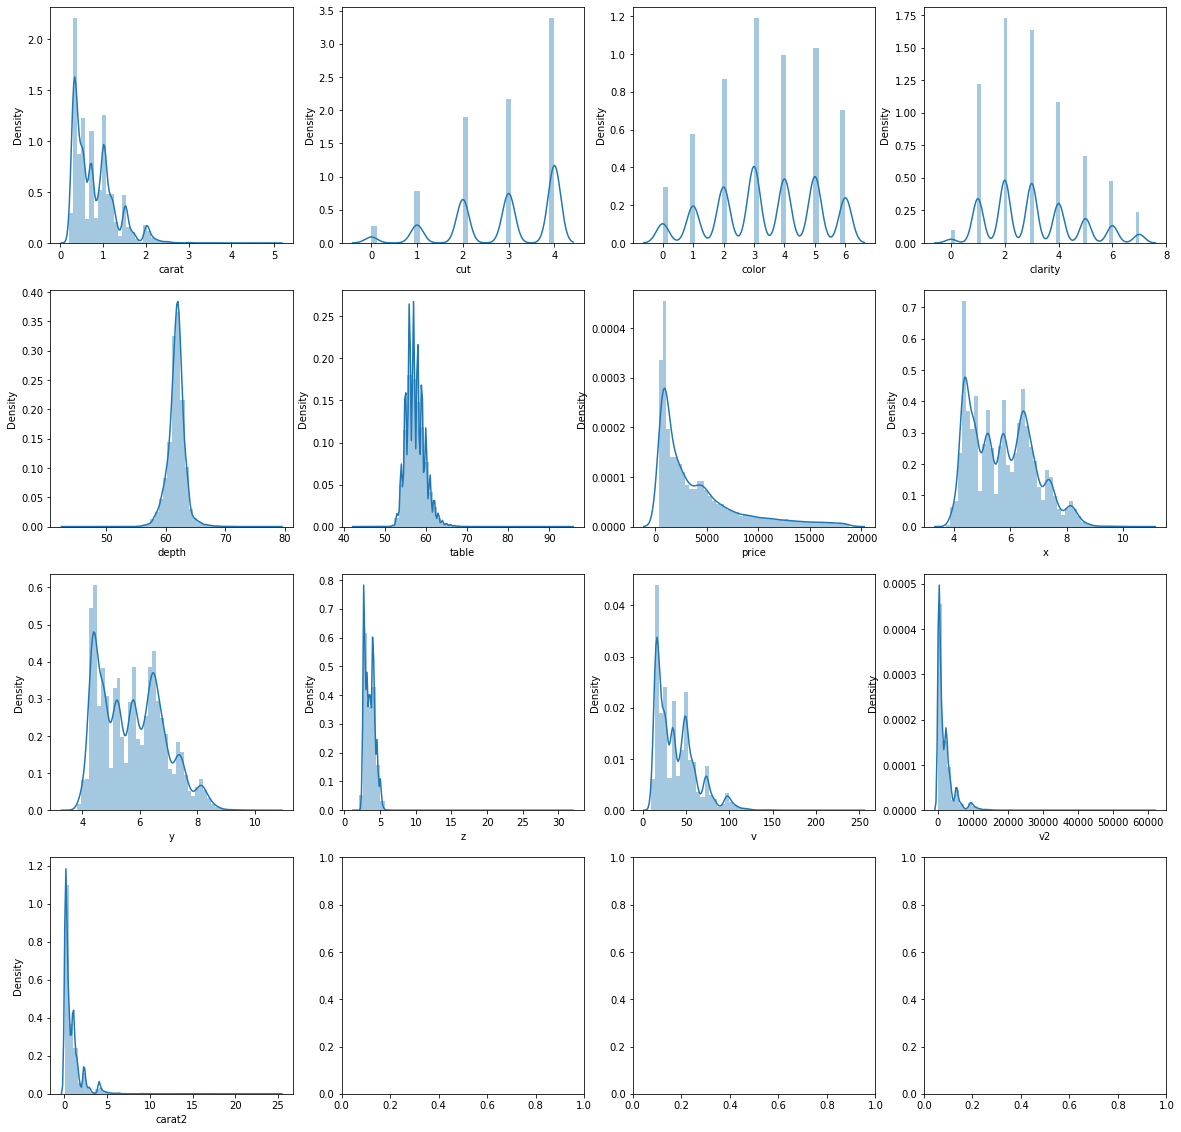

In [56]:
fig ,ax = plt.subplots(4,4,figsize=(20,20))
i = j = 0
for col in list(strat_train_set.columns):
  sns.distplot(strat_train_set[col],ax=ax[j][i]);
  i = i + 1
  if i == 4:
    j = j + 1
    i = 0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

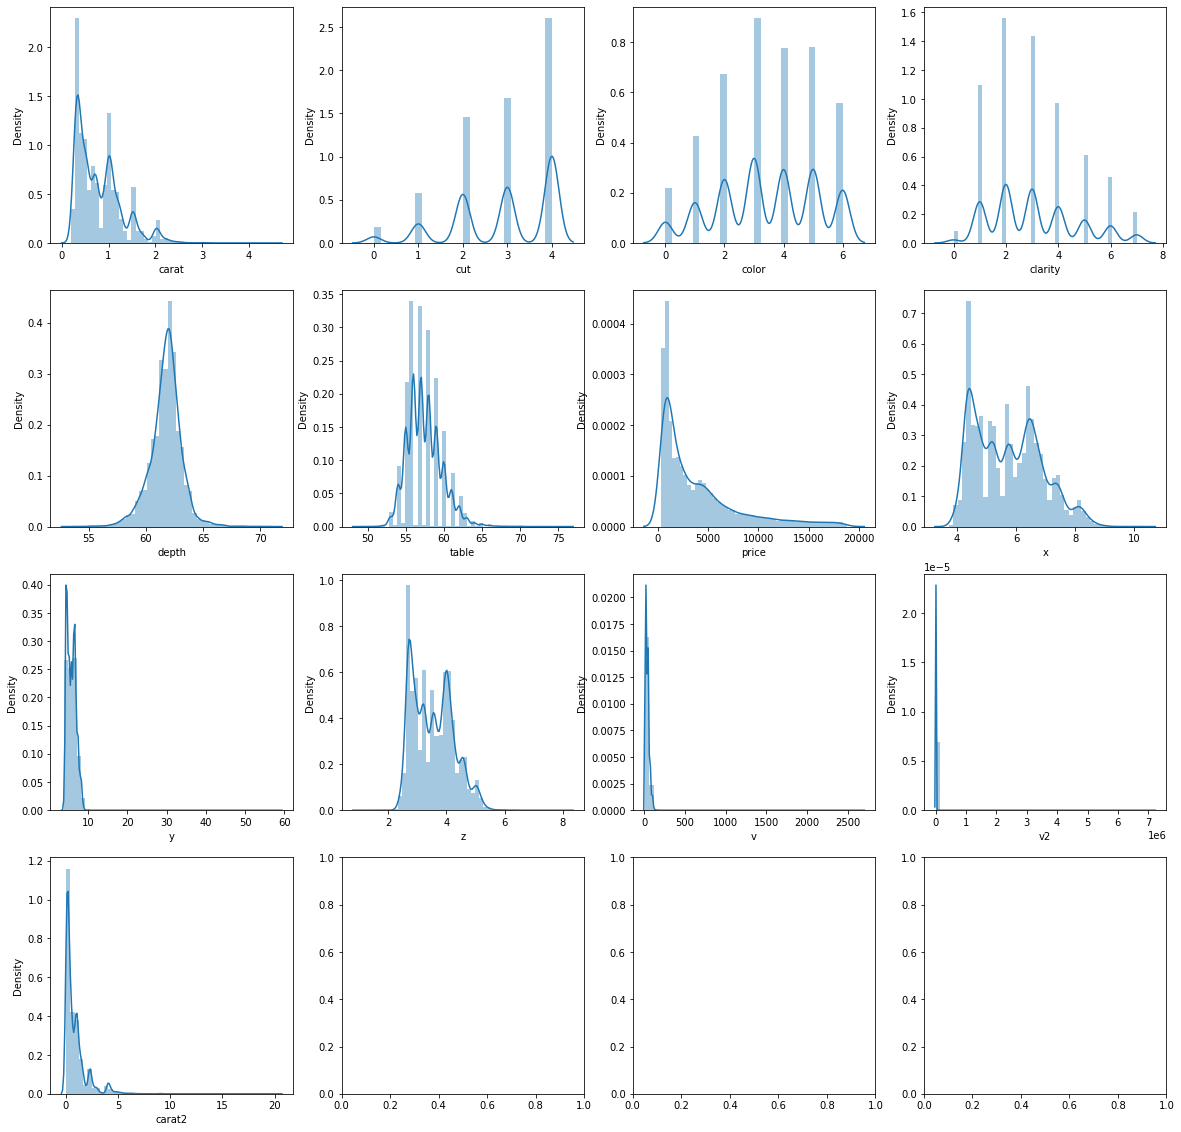

In [57]:
fig ,ax = plt.subplots(4,4,figsize=(20,20))
i = j = 0
for col in list(strat_test_val_set.columns):
  sns.distplot(strat_test_val_set[col],ax=ax[j][i]);
  i = i + 1
  if i == 4:
    j = j + 1
    i = 0
plt.show()

## Outliers Checking

**non parametric correlation**

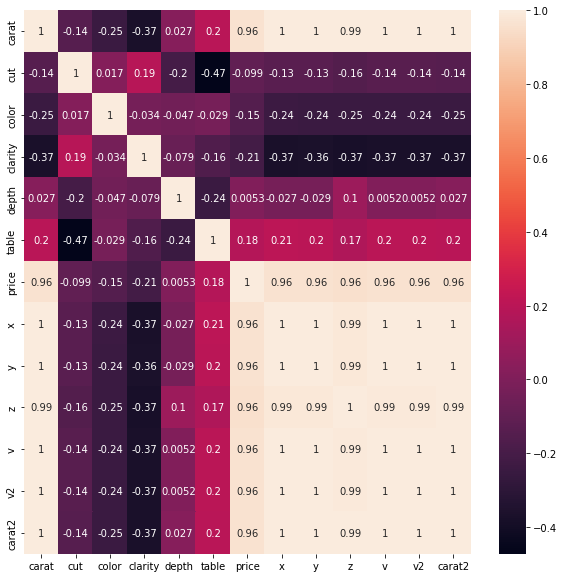

In [58]:
corr = strat_train_set.corr(method='spearman')#'pearson', 'kendall', 'spearman'
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

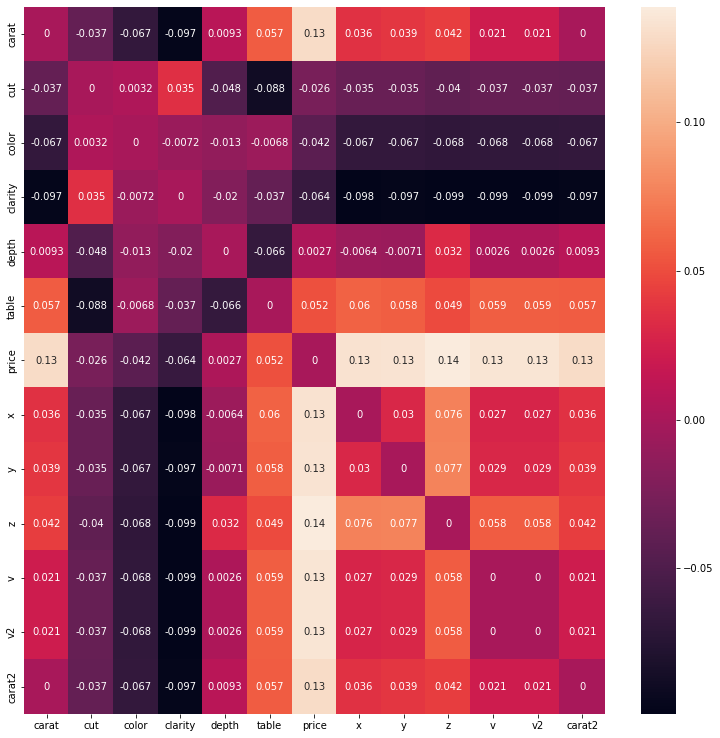

In [59]:
corr = strat_train_set.corr(method='spearman')-strat_train_set.corr(method='kendall')#'pearson', 'kendall', 'spearman'
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True)
plt.show()

We use non parametric correlation:




*   if (spearman_rho - kendall_tau > 0) there is no outliers between these two features.
*   if (spearman_rho - kendall_tau < 0) there is outliers between these two features.








**Distribution of the columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

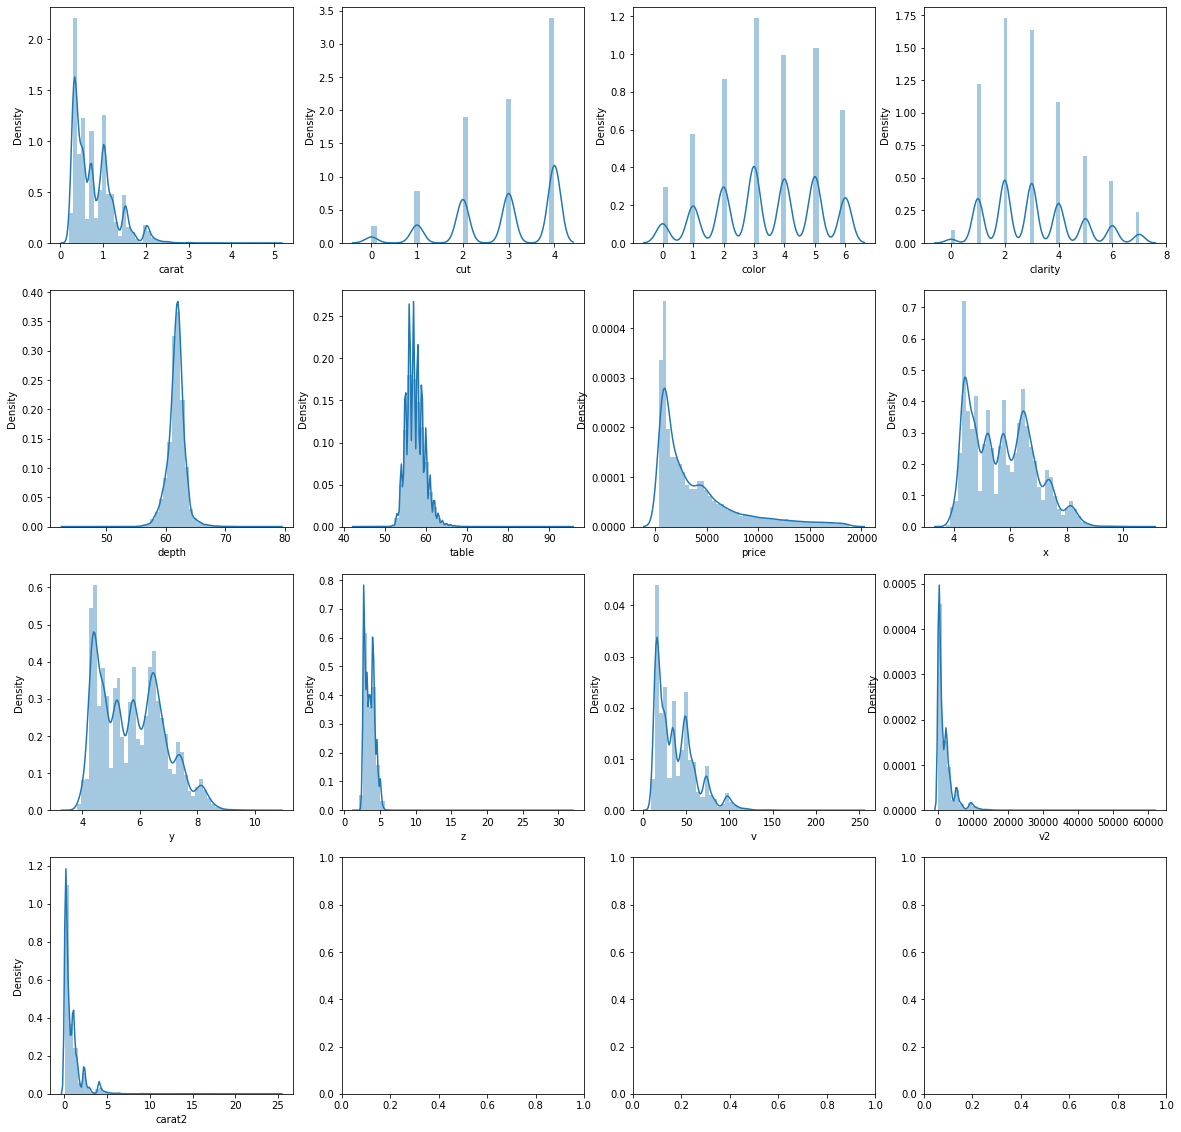

In [60]:
fig ,ax = plt.subplots(4,4,figsize=(20,20))
i = j = 0
for col in list(strat_train_set.columns):
  sns.distplot(strat_train_set[col],ax=ax[j][i]);
  i = i + 1
  if i == 4:
    j = j + 1
    i = 0
plt.show()

**IQR removing outliers**

In [61]:
def outliers(df,column,a=25,b=75):
  x=df[column]
  q1, q3 = x.quantile(a/100),x.quantile(b/100)
  iqr = q3 - q1
  lower_bound = np.max([q1 - (1.5 * iqr),0])
  upper_bound = q3 + (1.5 * iqr)
  print("<<<<<<<<",col,">>>>>>>>")
  print(lower_bound)
  print(upper_bound)
  mask = x.between( lower_bound, upper_bound, inclusive="both")
  mask = mask[mask==False]
  return mask

In [62]:
df = strat_train_set.copy()
for col in (df.columns):
  out = outliers(df,col,a=10,b=90)
  df = df.drop(out.index,axis=0)
  print("min = ",df [col].min())
  print("max = ",df [col].max())

<<<<<<<< carat >>>>>>>>
0.0
3.3099999999999996
min =  0.2
max =  3.24
<<<<<<<< cut >>>>>>>>
0.0
8.5
min =  0
max =  4
<<<<<<<< color >>>>>>>>
0.0
13.5
min =  0
max =  6
<<<<<<<< clarity >>>>>>>>
0.0
11.0
min =  0
max =  7
<<<<<<<< depth >>>>>>>>
55.050000000000004
68.25
min =  55.1
max =  68.2
<<<<<<<< table >>>>>>>>
47.5
67.5
min =  49.0
max =  67.0
<<<<<<<< price >>>>>>>>
0.0
23534.000000000004
min =  326
max =  18823
<<<<<<<< x >>>>>>>>
0.0
11.735
min =  3.73
max =  9.51
<<<<<<<< y >>>>>>>>
0.0
11.709999999999999
min =  3.68
max =  9.46
<<<<<<<< z >>>>>>>>
0.0
7.249999999999998
min =  1.41
max =  5.98
<<<<<<<< v >>>>>>>>
0.0
157.78310967571178
min =  9.496926035638598
max =  156.26955308179603
<<<<<<<< v2 >>>>>>>>
0.0
12693.561221682034
min =  90.19160412639026
max =  12692.919294562429
<<<<<<<< carat2 >>>>>>>>
0.0
5.48085
min =  0.04000000000000001
max =  5.475599999999999


In [63]:
strat_train_set = df

In [64]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37460 entries, 7223 to 48549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37460 non-null  float64
 1   cut      37460 non-null  int64  
 2   color    37460 non-null  int64  
 3   clarity  37460 non-null  int64  
 4   depth    37460 non-null  float64
 5   table    37460 non-null  float64
 6   price    37460 non-null  int64  
 7   x        37460 non-null  float64
 8   y        37460 non-null  float64
 9   z        37460 non-null  float64
 10  v        37460 non-null  float64
 11  v2       37460 non-null  float64
 12  carat2   37460 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 4.0 MB


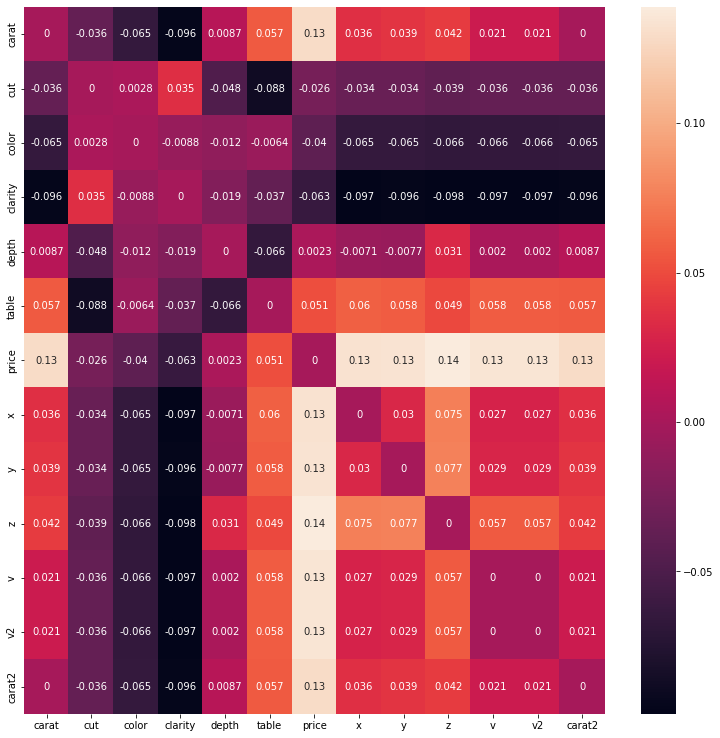

In [65]:
corr = strat_train_set.corr(method='spearman')-strat_train_set.corr(method='kendall')#'pearson', 'kendall', 'spearman'
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True)
plt.show()

**Distribution of the Filtered columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

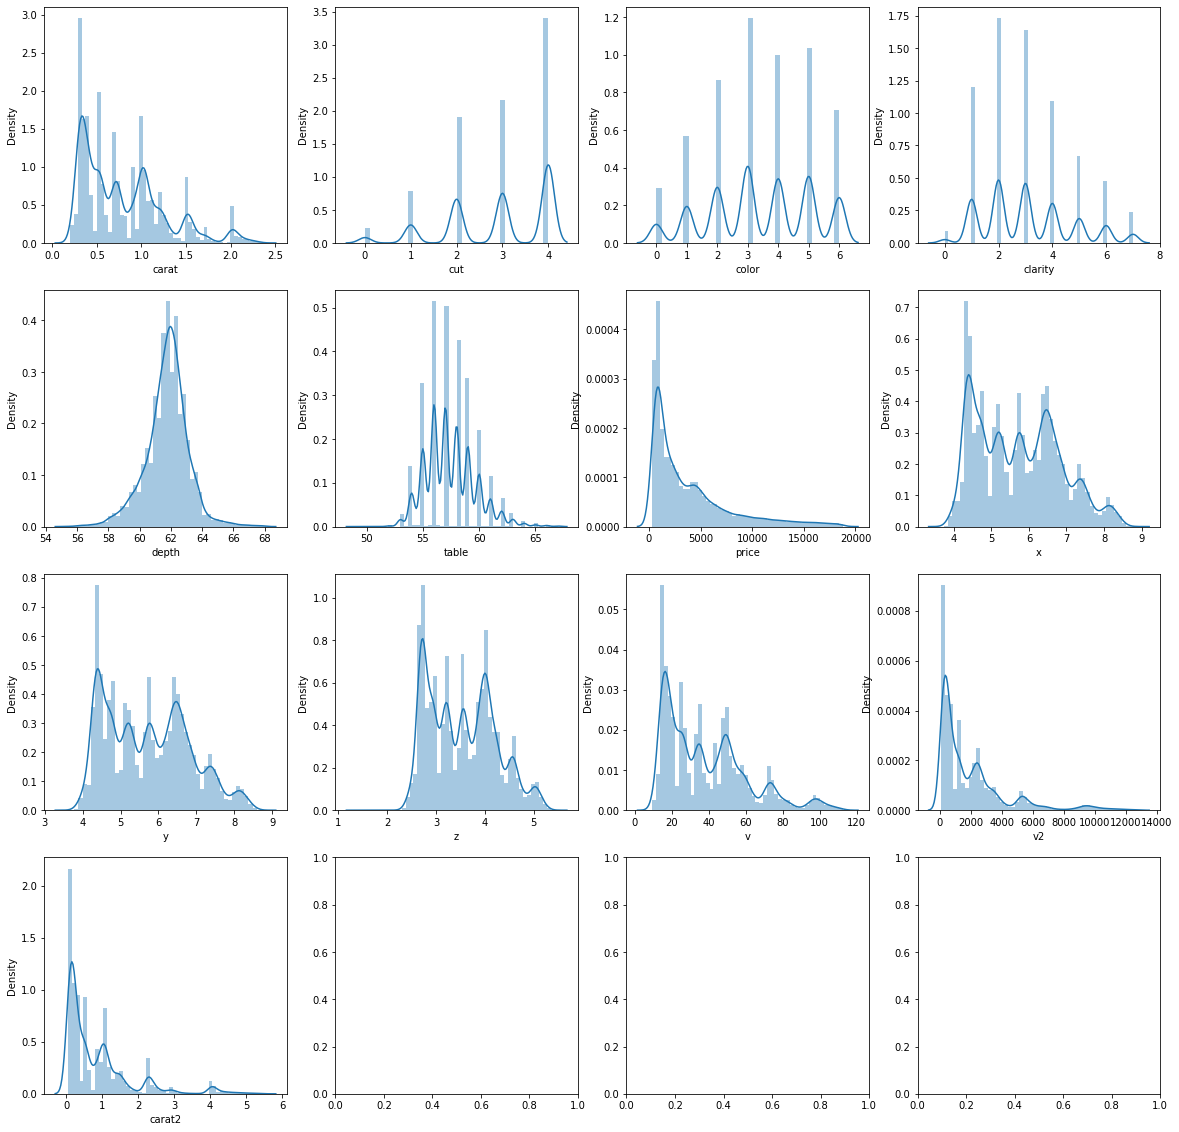

In [66]:
fig ,ax = plt.subplots(4,4,figsize=(20,20))
i = j = 0
for col in list(strat_train_set.columns):
  sns.distplot(strat_train_set[col],ax=ax[j][i]);
  i = i + 1
  if i == 4:
    j = j + 1
    i = 0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

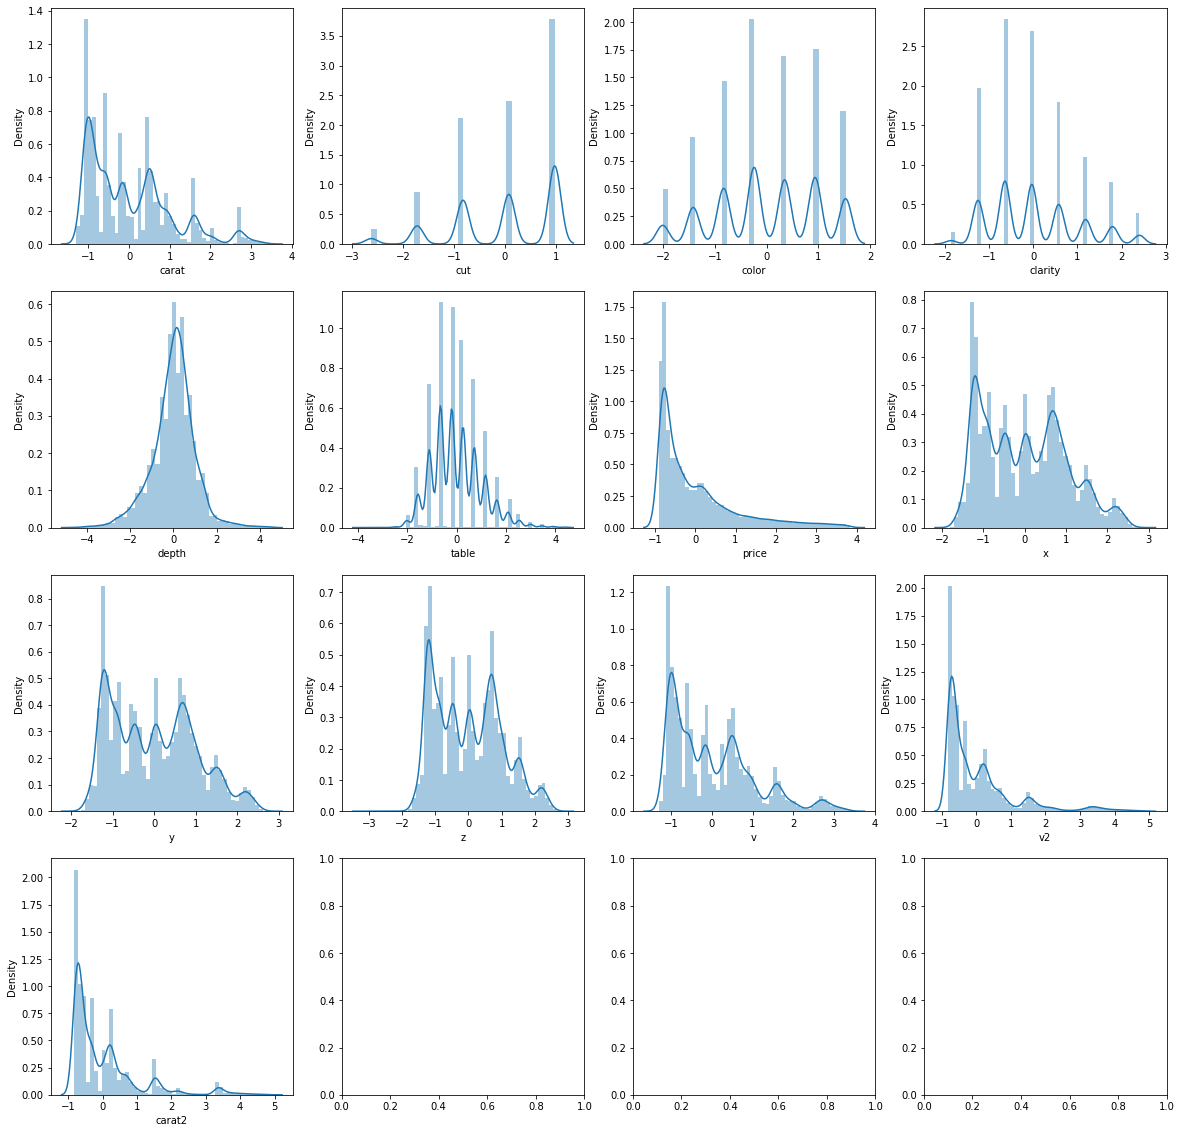

In [67]:
X_ = strat_train_set.copy()
std = StandardScaler()
X_ = pd.DataFrame(std.fit_transform(X_),columns = X_ .columns)
fig ,ax = plt.subplots(4,4,figsize=(20,20))
i = j = 0
for col in list(X_.columns):
  sns.distplot(X_[col],ax=ax[j][i]);
  i = i + 1
  if i == 4:
    j = j + 1
    i = 0
plt.show()

**skewness & kurtosis**

In [68]:
from scipy.stats import skew ,kurtosis

carat
skew :  0.9656045887136843
kurtosis :  0.4060726053379864


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


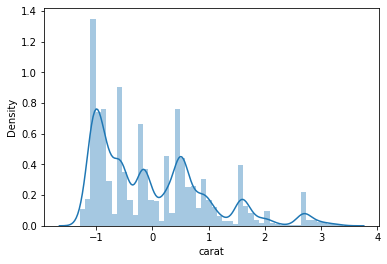

cut
skew :  -0.7057177649102573
kurtosis :  -0.4279041871706659


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


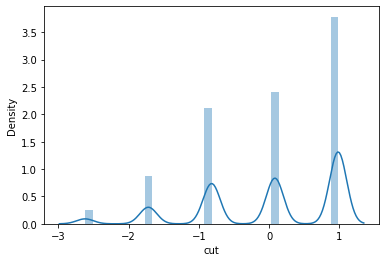

color
skew :  -0.19139293507352614
kurtosis :  -0.862630081929705


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


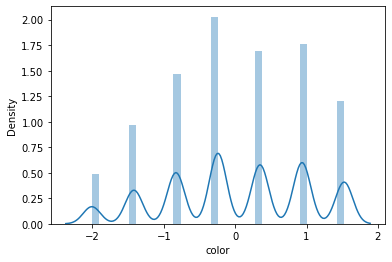

clarity
skew :  0.5539179186146928
kurtosis :  -0.38207677744517987


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


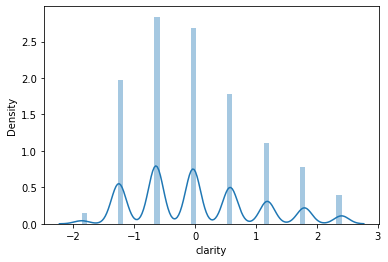

depth
skew :  -0.19815329252704925
kurtosis :  1.8903026172389161


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


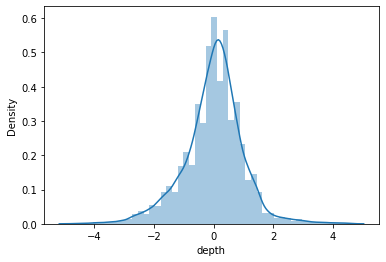

table
skew :  0.6123530924856676
kurtosis :  0.5692548774746964


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


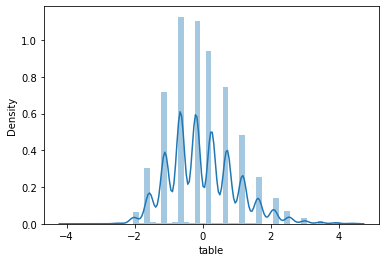

price
skew :  1.6208404289524672
kurtosis :  2.231008483051376


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


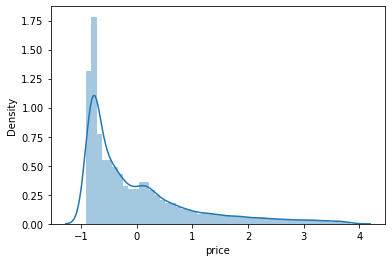

x
skew :  0.35371072047283775
kurtosis :  -0.8307999541520568


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


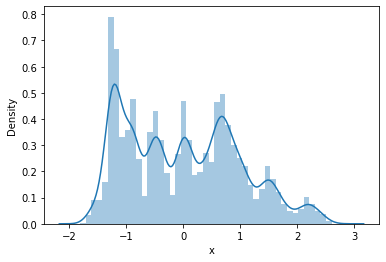

y
skew :  0.3498732425108849
kurtosis :  -0.8355201610044793


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


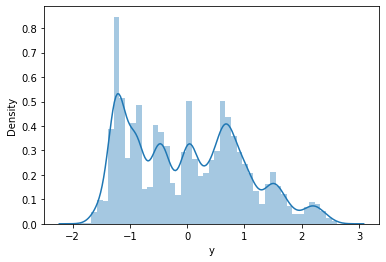

z
skew :  0.34446076413279053
kurtosis :  -0.8426339856215614


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


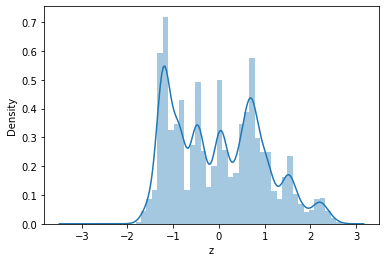

v
skew :  0.9715532563628485
kurtosis :  0.4286249390347643


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


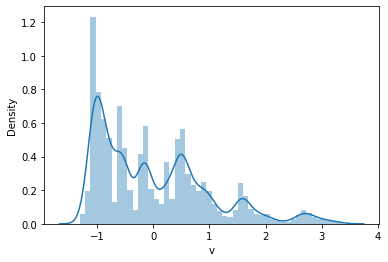

v2
skew :  2.053103834629269
kurtosis :  4.550879824621336


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


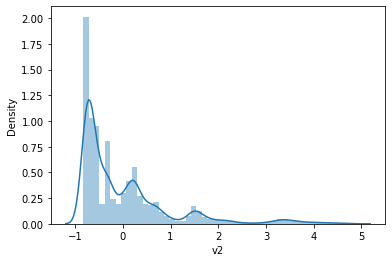

carat2
skew :  2.0433875467321623
kurtosis :  4.466500919776814


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


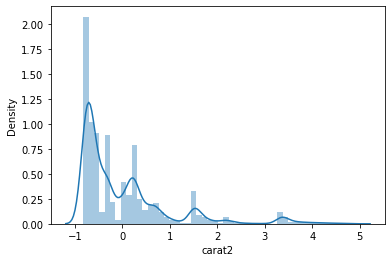

In [69]:
for col in X_:
  print(col)
  print("skew : ",skew(X_[col]))
  print("kurtosis : ",kurtosis(X_[col]))
  plt.figure()
  sns.distplot(X_[col])
  plt.show()

In [70]:
num_columns= list(strat_train_set.columns)
strat_train_set.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'v', 'v2', 'carat2'],
      dtype='object')

In [71]:
class columnDropperTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [72]:
col_to_exclude = ["x","y","z","price"]

In [73]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [74]:
y_train = strat_train_set["price"].copy()

**Important question could anyone ask:**

Why I'm removing outliers from the test set??

The answer is obvious: the test set must contain correct values and the outliers I'll remove are definitely nonrealistic diamonds.

In [75]:
def outliers(df,column,a=25,b=75):
  x=df[column]
  q1, q3 = x.quantile(a/100),x.quantile(b/100)
  iqr = q3 - q1
  lower_bound = np.max([q1 - (1.5 * iqr),0])
  upper_bound = q3 + (1.5 * iqr)
  print("<<<<<<<<",col,">>>>>>>>")
  print(lower_bound)
  print(upper_bound)
  mask = x.between( lower_bound, upper_bound, inclusive="both")
  mask = mask[mask==False]
  return mask

In [76]:
df = strat_test_val_set.copy()
for col in (df.columns):
  out = outliers(df,col,a=5,b=95)
  df = df.drop(out.index,axis=0)
  print("min = ",df [col].min())
  print("max = ",df [col].max())

<<<<<<<< carat >>>>>>>>
0.0
3.8249999999999997
min =  0.2
max =  3.02
<<<<<<<< cut >>>>>>>>
0.0
8.5
min =  0
max =  4
<<<<<<<< color >>>>>>>>
0.0
15.0
min =  0
max =  6
<<<<<<<< clarity >>>>>>>>
0.0
13.5
min =  0
max =  7
<<<<<<<< depth >>>>>>>>
52.69999999999999
70.30000000000001
min =  53.2
max =  70.1
<<<<<<<< table >>>>>>>>
43.5
71.5
min =  49.0
max =  70.0
<<<<<<<< price >>>>>>>>
0.0
32100.5
min =  326
max =  18818
<<<<<<<< x >>>>>>>>
0.0
12.754999999999999
min =  3.73
max =  9.54
<<<<<<<< y >>>>>>>>
0.0
12.690000000000001
min =  3.71
max =  9.38
<<<<<<<< z >>>>>>>>
0.0
7.850000000000001
min =  1.07
max =  6.16
<<<<<<<< v >>>>>>>>
0.0
183.56569062088593
min =  9.629141747015213
max =  144.1948587259463
<<<<<<<< v2 >>>>>>>>
0.0
16564.731031230967
min =  92.72037078411118
max =  16333.964659580703
<<<<<<<< carat2 >>>>>>>>
0.0
7.089999999999999
min =  0.04000000000000001
max =  7.0756000000000006


In [77]:
strat_test_val_set2 = df

## Finding the Best combination

Running It, takes a long time.

In [78]:
"""
strategies = ['mean' , 'median']
encoders_1 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()
encoders_2 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()
encoders_3 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()
scalers = {"MinMaxScaler":MinMaxScaler(),"StandardScaler":StandardScaler(),"MaxAbsScaler":MaxAbsScaler(),"RobustScaler":RobustScaler(),"QuantileTransformer (uniform)":QuantileTransformer(output_distribution='uniform'),"QuantileTransformer (normal)":QuantileTransformer(output_distribution='normal'),"PowerTransformer (yeo-johnson)":PowerTransformer(method="yeo-johnson"),"PowerTransformer (box-cox)":PowerTransformer(method="box-cox")}
models = {"LinearRegression":LinearRegressionmo,"Lasso":Lassomo,"Ridge":Ridgemo,"DecisionTreeRegressor":DecisionTreeRegressormo,"RandomForestRegressor":RandomForestRegressormo,"XGBRegressor":XGBRegressormo}
result_dec = {"strategy":[],"model":[],"scaler":[],"encoder_1":[],"encoder_2":[],"encoder_3":[],"RMSE":[],"STD":[]}
i=0
for stra in strategies:
  for e1_key, e1_mod in zip(encoders_1.keys(),encoders_1.values()):
    for e2_key, e2_mod in zip(encoders_2.keys(),encoders_2.values()):
      for e3_key, e3_mod in zip(encoders_3.keys(),encoders_3.values()):
        for s_key, s_mod in zip(scalers.keys(),scalers.values()):
          for m_key, m_mod in zip(models.keys(),models.values()):
            numerical_Pipeline = Pipeline([
                ("columnDropper",columnDropperTransformer(col_to_exclude)),
                ("imputer",SimpleImputer(strategy=stra)),
                ("std_scaler",s_mod)
                ])
            full_pipline = ColumnTransformer([
                ("cat1",e1_mod,["cut"]),
                ("cat2",e2_mod,['clarity']),
                ("cat3",e3_mod,["color"]),
                ("num",numerical_Pipeline,num_columns)
                ])
            diamonds_prepared = full_pipline.fit_transform(diamonds)
            m_mod.fit(diamonds_prepared,target_data)
            scores = cross_val_score(m_mod,diamonds_prepared,target_data,scoring="neg_mean_squared_error", cv=4)
            rmse_scores = np.sqrt(-scores)
            print("\n<<<<<<<<<<<<<<<<<<<<<<<<<<<",i,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
            print(np.shape(diamonds_prepared))
            print(stra,m_key,s_key,e1_key,e2_key,e3_key,"\n")
            display_scores(rmse_scores)
            result_dec["strategy"].append(stra)
            result_dec["model"].append(m_key)
            result_dec["scaler"].append(s_key)
            result_dec["encoder_1"].append(e1_key)
            result_dec["encoder_2"].append(e2_key)
            result_dec["encoder_3"].append(e3_key)
            result_dec["RMSE"].append(rmse_scores.mean())
            result_dec["STD"].append(rmse_scores.std())
            i=i+1
"""

'\nstrategies = [\'mean\' , \'median\']\nencoders_1 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()\nencoders_2 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()\nencoders_3 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()\nscalers = {"MinMaxScaler":MinMaxScaler(),"StandardScaler":StandardScaler(),"MaxAbsScaler":MaxAbsScaler(),"RobustScaler":RobustScaler(),"QuantileTransformer (uniform)":QuantileTransformer(output_distribution=\'uniform\'),"QuantileTransformer (normal)":QuantileTransformer(output_distribution=\'normal\'),"PowerTransformer (yeo-johnson)":PowerTransformer(method="yeo-johnson"),"PowerTransformer (box-cox)":PowerTransformer(method="box-cox")}\nmodels = {"LinearRegression":LinearRegressionmo,"Lasso":Lassomo,"Ridge":Ridgemo,"DecisionTreeRegressor":DecisionTreeRegressormo,"RandomForestRegressor":RandomForestRegres

## Training & Testing

In [79]:
y_test = strat_test_val_set2["price"].copy()

In [80]:
numerical_Pipeline = Pipeline([
    ("columnDropper",columnDropperTransformer(col_to_exclude)),
    ("imputer",SimpleImputer(strategy="median")),
    ("standrization",StandardScaler())
    ])
X_train = numerical_Pipeline.fit_transform(strat_train_set)
X_test = numerical_Pipeline.fit_transform(strat_test_val_set2)

In [81]:
print(X_train)
print(X_test)

[[ 0.26446059 -0.81867621 -0.83062906 ...  0.34894166  0.07259091
  -0.0035166 ]
 [-0.12963787  0.98207015  1.52655089 ... -0.12475823 -0.30750727
  -0.31214358]
 [ 1.60001649 -0.81867621 -0.83062906 ...  1.57144374  1.50317331
   1.54620485]
 ...
 [ 0.48340418 -0.81867621  0.34796091 ...  0.47260825  0.18784029
   0.1972164 ]
 [-0.52373633  0.98207015  1.52655089 ... -0.51767924 -0.54895104
  -0.55302317]
 [-0.30479274  0.98207015  0.9372559  ... -0.28815235 -0.41604263
  -0.42756505]]
[[ 2.57230019  0.07425155 -0.25031047 ...  2.56221983  3.09464313
   3.11942428]
 [ 0.44006251  0.07425155 -0.25031047 ...  0.44048524  0.15024682
   0.14875457]
 [ 0.93047717 -0.8312811  -0.8391541  ...  0.94789012  0.67697897
   0.65664007]
 ...
 [-1.00985912  0.07425155 -0.25031047 ... -1.01953229 -0.743248
  -0.7400698 ]
 [ 2.61494495 -1.73681374 -0.8391541  ...  2.76328456  3.47481938
   3.19903823]
 [-0.1996088   0.07425155  0.33853316 ... -0.22548317 -0.37184236
  -0.35625928]]


In [82]:
print(X_train.shape)
print(X_test.shape)

(37460, 9)
(16159, 9)


In [83]:
strat_test_val_set2["v2"].nlargest(100)

27163    16333.964660
27080    16216.974775
22578    16078.454925
27612    15382.496628
26554    15361.788183
             ...     
26904    12053.774446
26468    12047.691428
26948    12044.225450
27170    12008.328333
25456    11956.421367
Name: v2, Length: 100, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


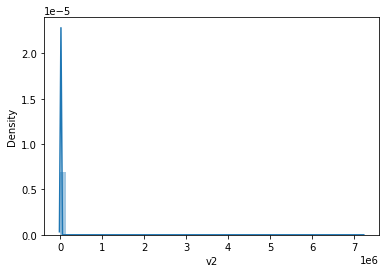

In [84]:
sns.distplot(strat_test_val_set["v2"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


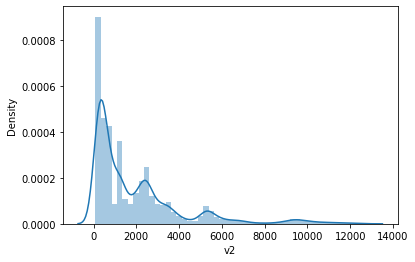

In [85]:
sns.distplot(strat_train_set["v2"])

In [86]:
lr = LinearRegression()
Lassomo = Lasso(alpha=0.001,max_iter=10000)
Ridgemo = Ridge(alpha=0.001,max_iter=10000)
Tlr = TransformedTargetRegressor(regressor=lr,func=np.log,inverse_func=np.exp)
TLassomo = TransformedTargetRegressor(regressor=Lassomo,func=np.log,inverse_func=np.exp)
TRidgemo = TransformedTargetRegressor(regressor=Ridgemo,func=np.log,inverse_func=np.exp)
dt = DecisionTreeRegressor()
rn = RandomForestRegressor()
extr= ExtraTreesRegressor()
GBr = GradientBoostingRegressor()
XGB = XGBRegressor( objective= 'reg:squarederror')
AdaBR1 = AdaBoostRegressor(base_estimator = XGB,learning_rate=0.01,loss='square')
AdaBR2 = AdaBoostRegressor(base_estimator = dt,learning_rate=0.01,loss='square')


models = [lr,Tlr,Lassomo,TLassomo,Ridgemo,TRidgemo,dt,rn,extr,GBr,XGB,AdaBR1,AdaBR2]
r2 = {}
rmse = {}
l = 1
for i in models:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    err = np.sqrt(mean_squared_error(y_test, ypred))
    rmse.update({str(i):err})
    print(i,":",r2_score(ypred,y_test)*100)
    r2.update({str(i):r2_score(ypred,y_test)*100})


LinearRegression() : 90.00686869106337
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression()) : 93.78538144732518


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+10, tolerance: 5.706e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.001, max_iter=10000) : 90.00220818960591
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(alpha=0.001, max_iter=10000)) : 94.04288329614059
Ridge(alpha=0.001, max_iter=10000) : 90.00686034699899
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(alpha=0.001, max_iter=10000)) : 93.78537710197442
DecisionTreeRegressor() : 95.85302867774365
RandomForestRegressor() : 97.5600533453672
ExtraTreesRegressor() : 97.49830429399134
GradientBoostingRegressor() : 96.91056700324839
XGBRegressor(objective='reg:squarederror') : 97.0789795009888
AdaBoostRegressor(base_estimator=XGBRegressor(objective='reg:squarederror'),
                  learning_rate=0.01, loss='square') : 97.07674591635781
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.01,
                  loss='square') : 97.46806268064528


In [87]:
rmse

{'LinearRegression()': 1175.3790433679876,
 "TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,\n                           regressor=LinearRegression())": 969.4992590675154,
 'Lasso(alpha=0.001, max_iter=10000)': 1175.5839432586272,
 "TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,\n                           regressor=Lasso(alpha=0.001, max_iter=10000))": 950.6368603811359,
 'Ridge(alpha=0.001, max_iter=10000)': 1175.3793887981744,
 "TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,\n                           regressor=Ridge(alpha=0.001, max_iter=10000))": 969.4992551468387,
 'DecisionTreeRegressor()': 786.1836870029504,
 'RandomForestRegressor()': 597.1922798406712,
 'ExtraTreesRegressor()': 603.7317774911604,
 'GradientBoostingRegressor()': 660.861020984152,
 "XGBRegressor(objective='reg:squarederror')": 647.1849255490063,
 "AdaBoostRegressor(base_estimator=XGBRegressor(objective='reg:squarederror'),\n    

Averaging Models predictions to improve the performance.

In [ ]:
models = [rn,AdaBR2]
r2 = {}
rmse = {}
l = 1
for i in models:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    if l == 1:
      sumpred = ypred
    else:
      sumpred = sumpred + ypred
    sum_pred = sumpred/l
    err = np.sqrt(mean_squared_error(y_test, sum_pred))
    rmse.update({str(l):err})
    print(l,":",r2_score(sum_pred,y_test)*100)
    r2.update({str(l):i.score(X_test,y_test)*100})
    l = l + 1

In [ ]:
rmse